We start by importing the necessary libraies needed for this project

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [102]:
# read the file
filename= "ENB2012_data.csv"
df = pd.read_csv(filename)

In [103]:
# inspect the dataframe
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [104]:
# rename columns to names understandable
df.rename(columns= {"X1":"relative_compact", 
                    "X2":"surface_area",
                    "X3":"wall_area",
                    "X4":"roof_area",
                    "X5":"overall_height",
                    "X6":"orientation",
                    "X7":"glazing_area",
                    "X8":"glazing_area_d",
                    "Y1":"heating_load",
                    "Y2":"cooling_load"}, 
          inplace=True)

In [105]:
# inspect the first five rows of the dataframe 
df.head()

,relative_compact,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_d,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


### Distribution of the features in the data

Variable Information:

The dataset contains eight features, denoted by X1…X8) and two labels (or outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two responses.

Relative Compactness: is the measure of compactness of the closure or building

Surface Area: Surface area of the Building in m²

Wall Area:  area of the building covered by width of the wall in m²

Roof Area: Area covered under roofs in m

Overall Height:Overall height of building in m²

Orientation: The orientation of building refers to the direction of normal to the normal to the long axis.2:North, 3:East, 4:South, 5:West

Glazing Area:The area of a glazing assembly is the interior surface area of the entire assembly, including glazing, sash, curbing, and other framing elements.

Glazing Area Distribution:How Glazing Area is distributed within the whole building

Heating Load:is the amount of heat energy that would need to be added to a space to maintain the temperature in an acceptable range.

Cooling Load:is the amount of heat energy that would need to be removed from a space (cooling) to maintain the temperature in an acceptable range.


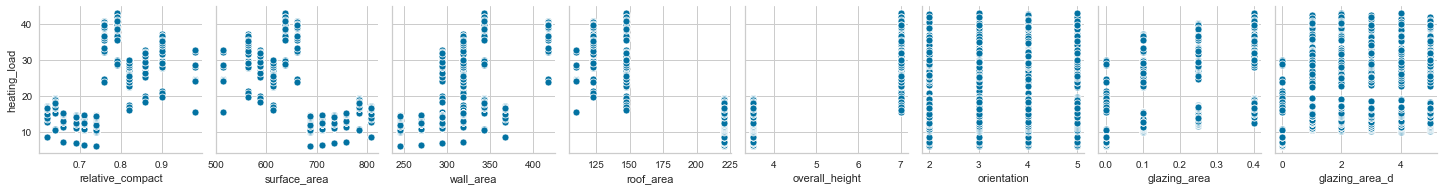

In [106]:
# distribution of your data
sns.pairplot(df,x_vars=["relative_compact","surface_area","wall_area","roof_area","overall_height",
                        "orientation","glazing_area","glazing_area_d"], y_vars =["heating_load"])



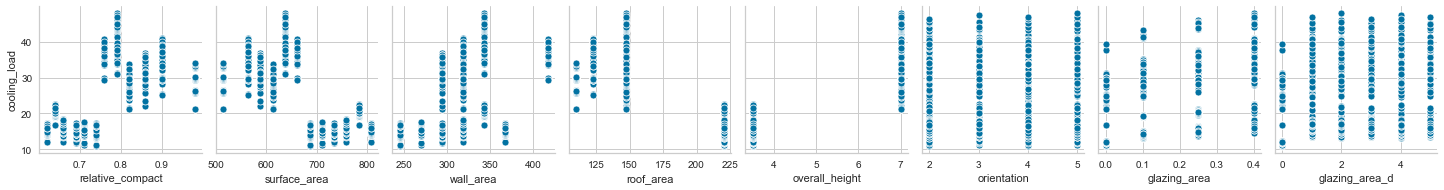

In [107]:
# distribution of your data
sns.pairplot(df,x_vars=["relative_compact","surface_area","wall_area","roof_area","overall_height",
                        "orientation","glazing_area","glazing_area_d"], y_vars =["cooling_load"])



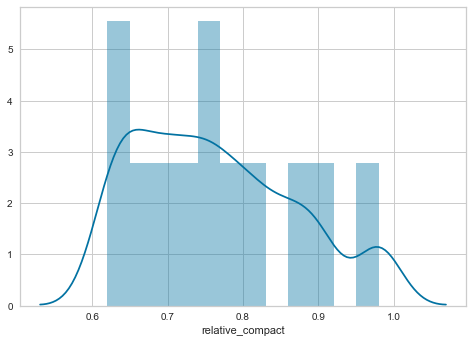

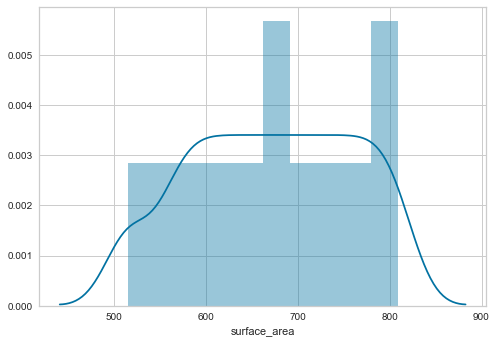

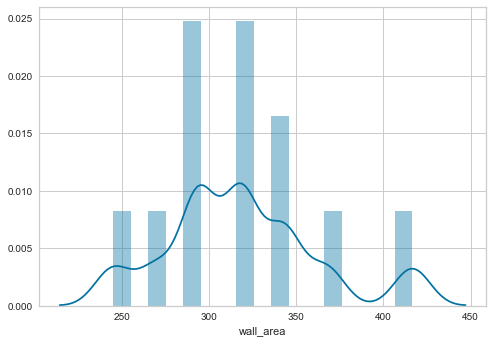

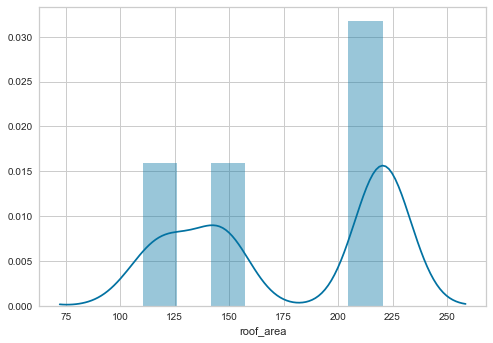

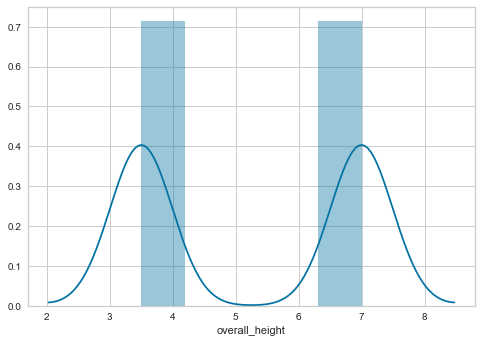

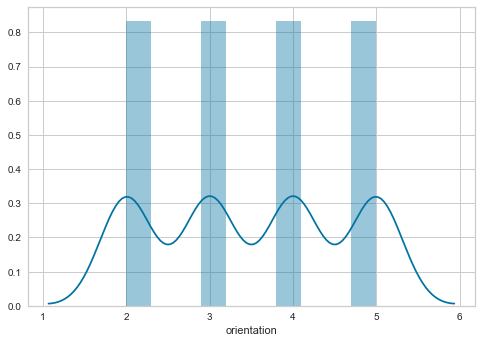

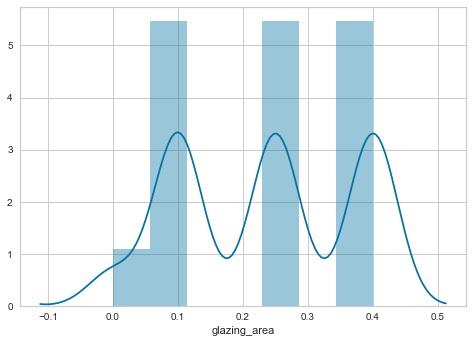

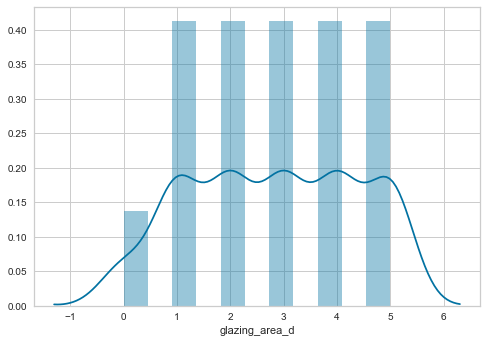

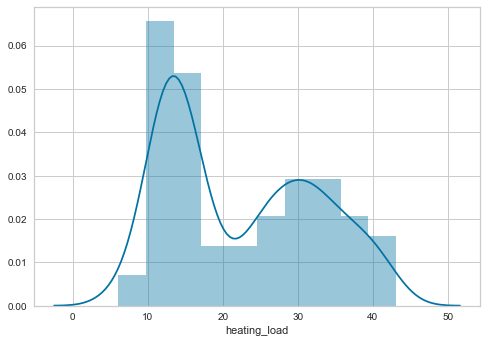

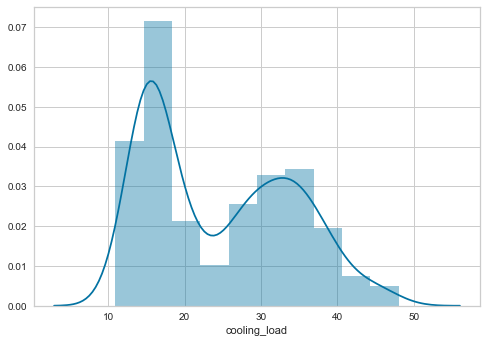

In [108]:
for column in df.columns:
    sns.distplot(df[column])
    plt.show();

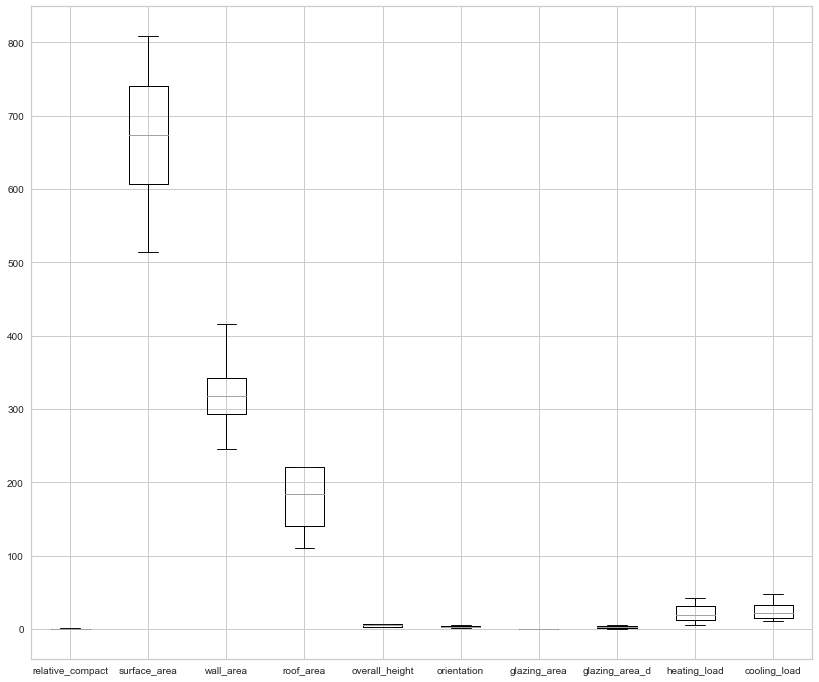

In [109]:
df.boxplot(figsize=(14,12))

### Observations
For the boxplot above, it is obvious that the disturbution columns are not on the same scale as mentioned early.
The relative compactness has the higest point range from 500 to 800 while surface_area falls within the range of 0 to 10.
From  a close examination of the dataframe statistical analysis and  the boxplot it is clear that there  are no outliers in the data. 

In [110]:
df.describe()

,relative_compact,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_d,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


### Correlation analysis
Explain how variables are correlated to one another

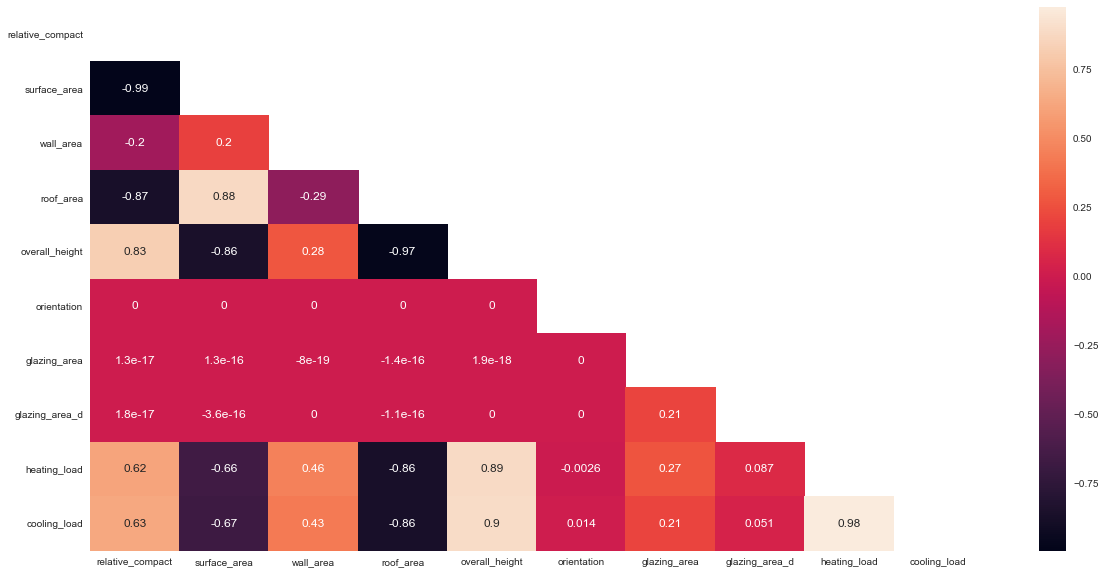

In [111]:
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)]=True
fig,ax = plt.subplots(figsize=(20,10))
ax =sns.heatmap(df.corr(),mask=mask,annot=True)
plt.show();

In [112]:
# Having a closer look at each varibles corrolation with the Y2( heating_load)
df.corr()["heating_load"].sort_values(ascending =False)

heating_load        1.000000
cooling_load        0.975862
overall_height      0.889431
relative_compact    0.622272
wall_area           0.455671
glazing_area        0.269841
glazing_area_d      0.087368
orientation        -0.002587
surface_area       -0.658120
roof_area          -0.861828
Name: heating_load, dtype: float64

In [113]:
# Having a closer look at each varibles corrolation with the Y1(Cooloing_load)
df.corr()["cooling_load"].sort_values(ascending =False)

cooling_load        1.000000
heating_load        0.975862
overall_height      0.895785
relative_compact    0.634339
wall_area           0.427117
glazing_area        0.207505
glazing_area_d      0.050525
orientation         0.014290
surface_area       -0.672999
roof_area          -0.862547
Name: cooling_load, dtype: float64

#### Observations:
 
Roof area and Surface area range is high for minimum/ lowest (3.5) over-all height and
Roof area and Surface area range is low for maximum/ highest (7.0) over-all height.
There are no data points when the overall height is 7 and the highest surface area range and also for low overall height 3.5, we have no data points with the low surface area range.
It is clearly evident that the Load efficiency is influenced by the Wall Area, Roof Area, Glazing Area.
When the Glazing Area is high, Roof Area is high and Wall Area is high, Load will be high and viceversa.

### Dimensionality reduction
Explain how PCA can reduce the dimensions of your data into a smaller number of features

In [114]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
components = pca.fit_transform(df)

In [115]:
##df2 = px.data.df()
X = df[["relative_compact","surface_area","wall_area","roof_area","overall_height",
                        "orientation","glazing_area","glazing_area_d"]]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['heating_load'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [116]:
X = df[["relative_compact","surface_area","wall_area","roof_area","overall_height",
                        "orientation","glazing_area","glazing_area_d"]]

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['cooling_load'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

### Check for problems in the data
Here the discuss there are no problems in the data apart from scaling the data

In [117]:
# check for duplicates
df.duplicated().sum()

0

In [118]:
# check for missing values
df.isnull().sum().sum()

0

In [119]:
# checking for percentage of null values
df.isna().sum()/len(df)

relative_compact    0.0
surface_area        0.0
wall_area           0.0
roof_area           0.0
overall_height      0.0
orientation         0.0
glazing_area        0.0
glazing_area_d      0.0
heating_load        0.0
cooling_load        0.0
dtype: float64

In [120]:
df["relative_compact"].value_counts()

0.90    64
0.79    64
0.71    64
0.66    64
0.98    64
0.64    64
0.86    64
0.76    64
0.74    64
0.82    64
0.62    64
0.69    64
Name: relative_compact, dtype: int64

In [121]:
df["surface_area"].value_counts()

563.5    64
735.0    64
686.0    64
637.0    64
808.5    64
514.5    64
759.5    64
710.5    64
661.5    64
612.5    64
784.0    64
588.0    64
Name: surface_area, dtype: int64

In [122]:
df["wall_area"].value_counts()

318.5    192
294.0    192
343.0    128
367.5     64
245.0     64
269.5     64
416.5     64
Name: wall_area, dtype: int64

In [123]:
df["roof_area"].value_counts()

220.50    384
147.00    192
122.50    128
110.25     64
Name: roof_area, dtype: int64

In [124]:
df["overall_height"].value_counts()

3.5    384
7.0    384
Name: overall_height, dtype: int64

In [125]:
df["orientation"].value_counts()

5    192
4    192
3    192
2    192
Name: orientation, dtype: int64

In [126]:
df["glazing_area"].value_counts()

0.40    240
0.10    240
0.25    240
0.00     48
Name: glazing_area, dtype: int64

In [127]:
df["glazing_area_d"].value_counts()

5    144
4    144
3    144
2    144
1    144
0     48
Name: glazing_area_d, dtype: int64

In [128]:

df["heating_load"].value_counts()

15.16    6
13.00    5
14.60    4
12.93    4
15.23    4
        ..
14.41    1
16.94    1
10.78    1
14.21    1
19.50    1
Name: heating_load, Length: 586, dtype: int64

In [129]:
df["cooling_load"].value_counts()

21.33    4
17.20    4
29.79    4
14.28    4
14.27    4
        ..
36.93    1
36.12    1
32.88    1
20.82    1
16.75    1
Name: cooling_load, Length: 636, dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   relative_compact  768 non-null    float64
 1   surface_area      768 non-null    float64
 2   wall_area         768 non-null    float64
 3   roof_area         768 non-null    float64
 4   overall_height    768 non-null    float64
 5   orientation       768 non-null    int64  
 6   glazing_area      768 non-null    float64
 7   glazing_area_d    768 non-null    int64  
 8   heating_load      768 non-null    float64
 9   cooling_load      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [131]:
df.head()

,relative_compact,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_d,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Spliting the dataset into test and train

In [132]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor, ElasticNet
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline


targets = ["heating_load", "cooling_load"]
X,y = df.drop(targets, axis=1), df[targets]

In [133]:
X

,relative_compact,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_d
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


In [134]:
y

,heating_load,cooling_load
0,15.55,21.33
1,15.55,21.33
2,15.55,21.33
3,15.55,21.33
4,20.84,28.28
...,...,...
763,17.88,21.40
764,16.54,16.88
765,16.44,17.11
766,16.48,16.61


### Spot check of Machine learning Algorithms 

In [135]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor, ElasticNet
from sklearn.multioutput import MultiOutputRegressor

num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
#Explain the significance nd the matrix 
#

ScaledLR: -9.495640 (1.175566)
ScaledLASSO: -12.681928 (1.652753)
ScaledEN: -17.583377 (2.453508)
ScaledKNN: -5.472203 (0.867481)
ScaledRF: -1.802478 (0.370633)


In [136]:
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# split your data into 30% test, 70% training points
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# train model
LinearReg = LinearRegression()
scaler= StandardScaler()

pipe=make_pipeline(scaler, LinearReg)

pipe.fit(X_train, y_train)

# estimate train and test
train_pred = pipe.predict(X_train)
predictions = pipe.predict(X_test)

# Evaluate the model
print(f"Linear Regression - MAE error: train --> {mean_absolute_error(y_train, train_pred)}")
print(f"Linear Regression - MAE error: test --> {mean_absolute_error(y_test, predictions)}")
#imp = pd.Series(, index=)
imp = pd.DataFrame()
imp["Features"] = X.columns
imp["Scores"]= pipe[1].coef_[0]
px.bar(imp, x="Features", y="Scores")


Linear Regression - MAE error: train --> 2.1291627601640153
Linear Regression - MAE error: test --> 2.2066226634811716


In [137]:

fig= go.Figure()

fig.add_trace(go.Scatter(x=X_test["relative_compact"], y=y_test.iloc[:,0], mode="markers", name="actual"))
fig.add_trace(go.Scatter(x=X_test["relative_compact"], y=predictions[:,0], mode="markers", name="predictions"))


fig.update_layout(
    xaxis_title="relative_compact",
    yaxis_title="Predictions",
    legend_title="Predictions vs actual")

fig.show()

In [138]:
# train model
#pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
KNN = KNeighborsRegressor()
scaler= StandardScaler()

pipe = make_pipeline(scaler, KNN)

pipe.fit(X_train, y_train)

# estimate train and test
train_pred = pipe.predict(X_train)
predictions = pipe.predict(X_test)

# Evaluate the model
print(f"KNN - MAE error: train --> {mean_absolute_error(y_train, train_pred)}")

print(f"KNN - MAE error: test --> {mean_absolute_error(y_test, predictions)}")



KNN - MAE error: train --> 1.3271787709497205
KNN - MAE error: test --> 1.7161991341991336


In [139]:
# train model
lasso = Lasso(alpha=0.03)
scaler= StandardScaler()

pipe = make_pipeline(scaler, lasso)

pipe.fit(X_train, y_train)

# estimate train and test
train_pred = pipe.predict(X_train)
predictions = pipe.predict(X_test)

# Evaluate the model
print(f"Lasso - MAE error: train --> {mean_absolute_error(y_train, train_pred)}")
print(f"Lasso - MAE error: test --> {mean_absolute_error(y_test, predictions)}")
imp = pd.DataFrame()
imp["Features"] = X.columns
imp["Scores"]= pipe[1].coef_[0]
px.bar(imp, x="Features", y="Scores")

Lasso - MAE error: train --> 2.1772575216081247
Lasso - MAE error: test --> 2.2364479746141726


In [140]:
from sklearn.linear_model import SGDRegressor, ElasticNet
from sklearn.multioutput import MultiOutputRegressor

# train model
sgd = MultiOutputRegressor(SGDRegressor(loss="huber", penalty="l1", learning_rate="optimal", eta0=0.001, alpha=0.001))
scaler= StandardScaler()

pipe = make_pipeline(scaler, sgd)

pipe.fit(X_train, y_train)

# estimate train and test
train_pred = pipe.predict(X_train)
predictions = pipe.predict(X_test)

# Evaluate the model
print(f"SGD- MAE error: train --> {mean_absolute_error(y_train, train_pred)}")
print(f"SGD- MAE error: test --> {mean_absolute_error(y_test, predictions)}")
imp = pd.DataFrame()
imp["Features"] = X.columns
imp["Scores"]= pipe[1].estimators_[0].coef_
px.bar(imp, x="Features", y="Scores")

SGD- MAE error: train --> 2.152077040628339
SGD- MAE error: test --> 2.260490208094452


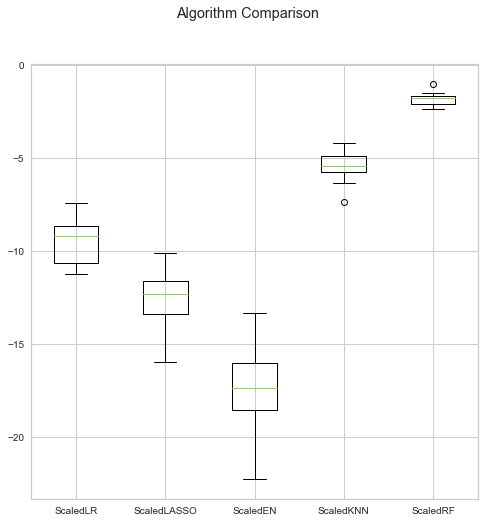

In [142]:
# Compare Algorithms
fig = plt.figure(figsize=(8,8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [82]:
from sklearn.metrics import r2_score

model  = RandomForestRegressor()

# split  data into 30% test, 70% training points
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# train model
model.fit(X_train, y_train)

# estimate train and test
train_pred = pipe.predict(X_train)
predictions = pipe.predict(X_test)

# Evaluate the model
print(f"RF- MAE error: train --> {mean_absolute_error(y_train, train_pred)}")
print(f"RF- MAE error: test --> {mean_absolute_error(y_test, predictions)}")

print(f"RF- r2: train --> {r2_score(y_train, train_pred)}")
print(f"RF- r2: test --> {r2_score(y_test, predictions)}")

RF- MAE error: train --> 2.141221873527745
RF- MAE error: test --> 2.2066927451635703
RF- r2: train --> 0.894725913617696
RF- r2: test --> 0.8959514340083312


In [83]:
from sklearn.model_selection import GridSearchCV

parameters = {"n_estimators": [100, 200, 300, 400, 500, 1000, 1500],
              "max_depth": [2, 3, 4, 5, 6, 7]}

clf = GridSearchCV(estimator=RandomForestRegressor(), 
                   param_grid=parameters, 
                   scoring = 'neg_mean_squared_error',
                   verbose=2, 
                   return_train_score=True, 
                   n_jobs=4)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    8.9s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   38.5s
[Parallel(n_jobs=4)]: Done 210 out of 210 | elapsed:   58.3s finished


GridSearchCV(estimator=RandomForestRegressor(), n_jobs=4,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7],
                         'n_estimators': [100, 200, 300, 400, 500, 1000, 1500]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [84]:
data = pd.DataFrame()
data["train"] = clf.cv_results_['mean_train_score']
data["validation"] = clf.cv_results_['mean_test_score']
data["params"] = clf.cv_results_['params']

In [85]:
data[data['params']== {'max_depth': 6, 'n_estimators': 1000}]

,train,validation,params
33,-1.09807,-1.807138,"{'max_depth': 6, 'n_estimators': 1000}"


In [86]:
# best model
clf.best_params_

{'max_depth': 6, 'n_estimators': 500}

In [87]:
# split  data into 30% test, 70% training points
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=22)

best_model= RandomForestRegressor(max_depth= 6, n_estimators= 1000)

# train model
best_model.fit(X_train, y_train)

# estimate train and test
train_pred = best_model.predict(X_train)
predictions = best_model.predict(X_test)

# Evaluate the model
print(f"RF- MAE error: train --> {mean_absolute_error(y_train, train_pred)}")
print(f"RF- MAE error: test --> {mean_absolute_error(y_test, predictions)}")

print(f"RF- r2: train --> {r2_score(y_train, train_pred)}")
print(f"RF- r2: test --> {r2_score(y_test, predictions)}")

RF- MAE error: train --> 0.6471405341837466
RF- MAE error: test --> 0.754133837025485
RF- r2: train --> 0.9868489125722024
RF- r2: test --> 0.981380207695963


In [88]:
data = pd.DataFrame()
data["scores"]= best_model.feature_importances_
data["features"] = X.columns
data = data.sort_values("scores", ascending=False)

In [89]:
# feature importance
px.bar(data, x="features", y="scores")

In [90]:
# Recursive Feature Elimination aka RFE
#orientation

from sklearn.feature_selection import RFE
import numpy as np

model= RandomForestRegressor(max_depth= 6, n_estimators= 1000)

# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(2, 8):
        rfe = RFE(estimator=model, n_features_to_select=i)
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = KFold(n_splits=5)
    scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=6)
    return scores

# get the models to evaluate
models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>2 -11.216 (8.551)
>3 -11.208 (8.584)
>4 -11.209 (8.585)
>5 -6.770 (9.952)
>6 -3.174 (3.183)
>7 -3.189 (3.225)


In [91]:
# plot model performance for comparison
#plt.figure(figsize=(12,12))
#plt.boxplot(results, labels=names, showmeans=True)
#plt.xlabel("Number of features")
#plt.ylabel("Mean absolute error")
#plt.show()

In [92]:
X=X.drop("orientation", axis=1)

In [93]:
# split  data into 30% test, 70% training points
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=22)

best_model= RandomForestRegressor(max_depth= 6, n_estimators= 1000)

# train model
best_model.fit(X_train, y_train)

# estimate train and test
train_pred = best_model.predict(X_train)
predictions = best_model.predict(X_test)

# Evaluate the model
print(f"RF- MAE error: train --> {mean_absolute_error(y_train, train_pred)}")
print(f"RF- MAE error: test --> {mean_absolute_error(y_test, predictions)}")

print(f"RF- r2: train --> {r2_score(y_train, train_pred)}")
print(f"RF- r2: test --> {r2_score(y_test, predictions)}")

RF- MAE error: train --> 0.6699531632574683
RF- MAE error: test --> 0.7414995134917555
RF- r2: train --> 0.9856349001011093
RF- r2: test --> 0.9819894459509653


In [94]:
def visualize_model(plot, model, train, test):
    visualizer = plot(model)
    visualizer.fit(*train)
    visualizer.score(*test)
    visualizer.show()

ValueError: color kwarg must have one color per data set. 499 data sets and 1 colors were provided

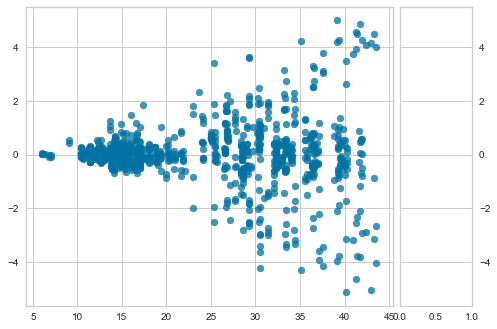

In [97]:
from yellowbrick.regressor import ResidualsPlot, PredictionError
#fig, axes = plt.subplots(2, 1, figsize=(16,10))
for i, plot in enumerate([ResidualsPlot, PredictionError]):
    visualize_model(plot,best_model, (X_train, y_train), (X_test, y_test))